In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
mushrooms = pd.read_csv("secondary_data.csv", sep = ";")

In [3]:
mushrooms.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
# Shape of the dataset, response variable and feature names, data type of each column
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
# Summary statistics for the numeric features
mushrooms.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [6]:
# Count the number of missing values within each column
mushrooms.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

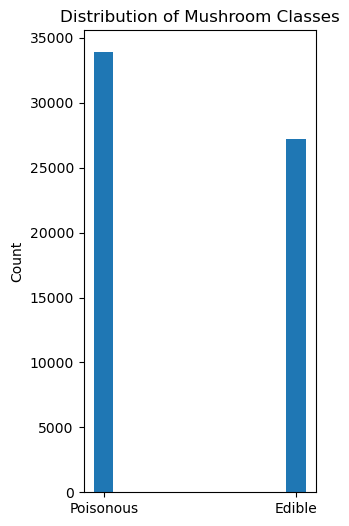

In [7]:
# Count the number of observations of poisonous and edible mushrooms and plot them
class_counts = mushrooms["class"].value_counts()

plt.figure(figsize = (3, 6))
plt.bar(class_counts.index, class_counts.values, width = 0.1)
plt.ylabel('Count')
plt.xticks(["p", "e"], ["Poisonous", "Edible"])
plt.title('Distribution of Mushroom Classes')
plt.show()

In [8]:
# Label encoding the response variable and categorical features
le = LabelEncoder()
mask = mushrooms.isna()
cols_to_encode = mushrooms.columns.drop(["cap-diameter", "stem-width", "stem-height"])

for col in cols_to_encode:
    mushrooms[col] = le.fit_transform(mushrooms[col])

mushrooms = mushrooms.where(~ mask, np.nan)

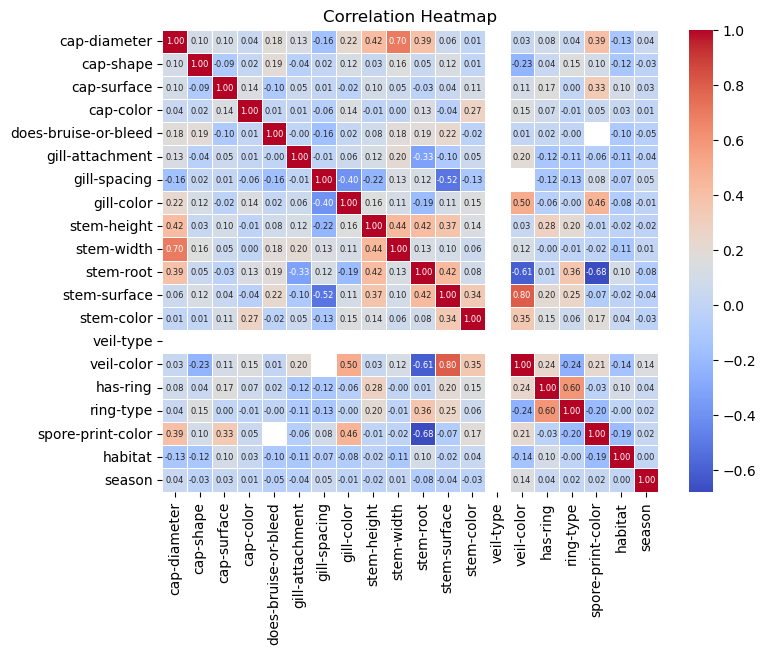

In [9]:
# Correlation heatmap of the features
correlation_matrix = mushrooms.drop('class', axis=1).corr(method = "pearson")
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# veil-type only has 1 categorical value ("u") or it is missing in the dataset.update_display.
# So we will remove it from the analysis since it probably doesn't strongly contribute to the variation
# in the response 

# I THINK ITS OK TO REMOVE THIS VARIABLE, WHAT DO YOU THINK???

# mushrooms = mushrooms.drop(columns = ["veil-type"])

In [11]:
# Z-transform the numeric features
quantitative_vars = mushrooms[["cap-diameter", "stem-width", "stem-height"]]
mushrooms.drop(["cap-diameter", "stem-width", "stem-height"], axis=1, inplace=True)
sc = StandardScaler()
sc.fit(quantitative_vars)
xscaled=sc.transform(quantitative_vars)

quant_scaled=pd.DataFrame(data=xscaled,columns=["cap-diameter", "stem-width", "stem-height"])
mushrooms = pd.concat([quant_scaled, mushrooms], axis = 1)
class_col = mushrooms.pop("class")
mushrooms.insert(0, "class", class_col)
mushrooms

,class,cap-diameter,stem-width,stem-height,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,1.619462,0.492293,3.076705,6,2.0,6,0,2.0,NaN,10,4.0,7.0,11,4.0,1,2.0,NaN,0,3
1,1,1.873982,0.601900,3.385311,6,2.0,6,0,2.0,NaN,10,4.0,7.0,11,4.0,1,2.0,NaN,0,2
2,1,1.393432,0.557061,3.328931,6,2.0,6,0,2.0,NaN,10,4.0,7.0,11,4.0,1,2.0,NaN,0,3
3,1,1.412426,0.381690,2.726555,2,3.0,1,0,2.0,NaN,10,4.0,7.0,11,4.0,1,5.0,NaN,0,3
4,1,1.501699,0.503254,2.952075,6,3.0,6,0,2.0,NaN,10,4.0,7.0,11,4.0,1,5.0,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,-1.054903,-0.590822,-0.786809,5,7.0,11,0,3.0,2.0,2,NaN,NaN,12,NaN,0,1.0,NaN,0,0
61065,1,-1.037808,-0.669539,-1.009362,2,7.0,11,0,3.0,2.0,2,NaN,NaN,12,NaN,0,1.0,NaN,0,0
61066,1,-1.037808,-0.575875,-0.807581,5,7.0,11,0,3.0,2.0,2,NaN,NaN,12,NaN,0,1.0,NaN,0,2
61067,1,-1.043506,-0.668543,-0.896602,2,7.0,11,0,3.0,2.0,2,NaN,NaN,12,NaN,0,1.0,NaN,0,2


In [12]:
# Data types of all features after having scaled the quantitative features and label encoded the response variable
# and categorical features
mushrooms.dtypes

class                     int64
cap-diameter            float64
stem-width              float64
stem-height             float64
cap-shape                 int64
cap-surface             float64
cap-color                 int64
does-bruise-or-bleed      int64
gill-attachment         float64
gill-spacing            float64
gill-color                int64
stem-root               float64
stem-surface            float64
stem-color                int64
veil-color              float64
has-ring                  int64
ring-type               float64
spore-print-color       float64
habitat                   int64
season                    int64
dtype: object